Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

# Finanical Inclusion Survey Data

The main dataset contains demographic information and what financial services are used by approximately 33,610 individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

The data have been split between training and test sets. The test set contains all information about each individual except for whether the respondent has a bank account or not.

Your goal is to accurately predict the likelihood that an individual has a bank account or not, i.e. Yes = 1, No = 0.

# About the data

You are asked to make predictions for each unique id in the test dataset about the likelihood of the person having a bank account. You will train your model on 70% of the data and test your model on the final 30% of the data.

* Train.csv is 70% of the data, across the four East African countries (i.e. Kenya, Rwanda, Tanzania, and Uganda)
* Test.csv is 30% of the complete dataset across the East African countries.
* VariableDefinitions.csv is the full list of variables and their explanations.
* SubmissionSubmission.csv is an example of what your submission file should look like. Note that the variable unique_id in the submission file is:

 uniqueid + " x " + country name
 
The order of the rows does not matter, but the names of the unique_id's must be correct. The column "bank_account" is your prediction of the likelihood of the user having a bank account.

Two or more countries could have the same unique_id, this is why your submission file needs to have uniqueid x country.

# Importing the Dataset

In [1]:
import pandas as pd
import numpy as np

df= pd.read_csv('TrainDataset.csv')

In [2]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Tanzania,2017,uniqueid_3293,No,Rural,No,2,18,Female,Child,Divorced/Seperated,Tertiary education,Remittance Dependent
1,Tanzania,2017,uniqueid_4423,No,Urban,Yes,2,22,Female,Spouse,Single/Never Married,Primary education,Self employed
2,Rwanda,2016,uniqueid_8196,No,Rural,Yes,4,31,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
3,Uganda,2018,uniqueid_803,No,Rural,No,1,56,Male,Head of Household,Single/Never Married,Primary education,Self employed
4,Rwanda,2016,uniqueid_8418,No,Rural,Yes,5,36,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18814,Rwanda,2016,uniqueid_8478,No,Rural,Yes,2,67,Female,Head of Household,Widowed,No formal education,Remittance Dependent
18815,Rwanda,2016,uniqueid_7486,No,Rural,Yes,3,25,Male,Head of Household,Married/Living together,Primary education,Farming and Fishing
18816,Rwanda,2016,uniqueid_6068,No,Rural,Yes,7,16,Male,Child,Single/Never Married,Primary education,Farming and Fishing
18817,Kenya,2018,uniqueid_4274,No,Rural,Yes,1,81,Female,Head of Household,Widowed,No formal education,Farming and Fishing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18819 entries, 0 to 18818
Data columns (total 13 columns):
country                   18819 non-null object
year                      18819 non-null int64
uniqueid                  18819 non-null object
bank_account              18819 non-null object
location_type             18819 non-null object
cellphone_access          18819 non-null object
household_size            18819 non-null int64
age_of_respondent         18819 non-null int64
gender_of_respondent      18819 non-null object
relationship_with_head    18819 non-null object
marital_status            18819 non-null object
education_level           18819 non-null object
job_type                  18819 non-null object
dtypes: int64(3), object(10)
memory usage: 1.9+ MB


We have 13 columns in the dataset.

# Pre-Processing and EDA using Pandas Profiling package

In [4]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

In [65]:
prof.to_widgets()

# Pre-processing Checking and Removing the Null and NaN values

In [6]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [7]:
df=df.dropna(axis=0)

# Pre-Processing Label Encoding

In [8]:
df['country'].unique()

array(['Tanzania', 'Rwanda', 'Uganda', 'Kenya'], dtype=object)

In [9]:
df['year'].unique()

array([2017, 2016, 2018], dtype=int64)

In [10]:
df['bank_account'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [12]:
df['cellphone_access'].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df['household_size'].unique()

array([ 2,  4,  1,  5,  9,  6,  3,  8, 11, 10,  7, 12, 15, 14, 13, 16, 20,
       18, 21], dtype=int64)

In [14]:
df['age_of_respondent'].unique()

array([ 18,  22,  31,  56,  36,  23,  39,  37,  52,  65,  40,  30,  44,
        24,  29,  86,  42,  32,  75,  28,  35,  27,  59,  25,  85,  26,
        64,  16,  34,  20,  55,  38,  49,  19,  46,  67,  17,  66,  45,
        50,  21,  79,  54,  91,  62,  81,  48,  41,  47,  68,  70,  33,
        95,  58,  80,  43,  63,  60,  76,  82,  61,  53,  57,  69,  51,
        72,  90,  71,  92,  96,  74,  84,  98,  78,  77,  73,  89,  83,
        88,  94,  87,  93, 100,  99,  97], dtype=int64)

In [15]:
df['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df['relationship_with_head'].unique()

array(['Child', 'Spouse', 'Head of Household', 'Parent', 'Other relative',
       'Other non-relatives'], dtype=object)

In [17]:
df['marital_status'].unique()

array(['Divorced/Seperated', 'Single/Never Married',
       'Married/Living together', 'Widowed', 'Dont know'], dtype=object)

In [18]:
df['education_level'].unique()

array(['Tertiary education', 'Primary education', 'No formal education',
       'Secondary education', 'Vocational/Specialised training',
       'Other/Dont know/RTA'], dtype=object)

In [19]:
df['job_type'].unique()

array(['Remittance Dependent', 'Self employed', 'Farming and Fishing',
       'Informally employed', 'Dont Know/Refuse to answer',
       'Other Income', 'Government Dependent',
       'Formally employed Private', 'No Income',
       'Formally employed Government'], dtype=object)

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [21]:
df['job_type']=le.fit_transform(df['job_type'])
df['education_level']=le.fit_transform(df['education_level'])
df['marital_status']=le.fit_transform(df['marital_status'])
df['relationship_with_head']=le.fit_transform(df['relationship_with_head'])
df['gender_of_respondent']=le.fit_transform(df['gender_of_respondent'])
df['cellphone_access']=le.fit_transform(df['cellphone_access'])
df['location_type']=le.fit_transform(df['location_type'])
df['country']=le.fit_transform(df['country'])
df['bank_account']=le.fit_transform(df['bank_account'])

In [22]:
df['year']=le.fit_transform(df['year'])

# Finding the Correlation

In [23]:
df.corr()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
country,1.000000,-0.096757,-0.161547,0.153177,-0.149371,-0.123184,-0.057192,-0.021864,0.126557,0.009664,-0.051220,0.377612
year,-0.096757,1.000000,0.109098,0.216528,-0.064812,-0.054504,-0.023677,0.000144,0.002233,-0.023422,0.171362,0.268455
bank_account,-0.161547,0.109098,1.000000,0.085742,0.211920,-0.028647,0.021330,0.115665,-0.071117,-0.039687,0.325631,-0.065751
location_type,0.153177,0.216528,0.085742,1.000000,-0.082532,-0.255996,-0.044905,0.015781,0.010977,0.082124,0.120687,0.368555
cellphone_access,-0.149371,-0.064812,0.211920,-0.082532,1.000000,0.088005,-0.103968,0.105131,-0.054054,-0.094580,0.254553,-0.145935
household_size,-0.123184,-0.054504,-0.028647,-0.255996,0.088005,1.000000,-0.131367,0.015314,0.108107,-0.127539,-0.003222,-0.160117
age_of_respondent,-0.057192,-0.023677,0.021330,-0.044905,-0.103968,-0.131367,1.000000,0.011205,-0.151790,0.225616,-0.351885,-0.099099
gender_of_respondent,-0.021864,0.000144,0.115665,0.015781,0.105131,0.015314,0.011205,1.000000,-0.471259,-0.103445,0.122305,-0.030958
relationship_with_head,0.126557,0.002233,-0.071117,0.010977,-0.054054,0.108107,-0.151790,-0.471259,1.000000,-0.146051,-0.021011,0.041135
marital_status,0.009664,-0.023422,-0.039687,0.082124,-0.094580,-0.127539,0.225616,-0.103445,-0.146051,1.000000,-0.125030,0.060898


# Checking for Outliers

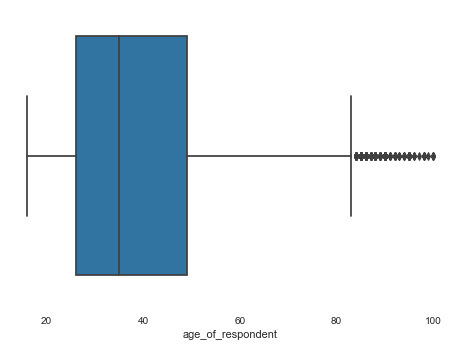

In [24]:
import seaborn as sns
sns.boxplot(x=df['age_of_respondent'])

In [25]:
df[df['age_of_respondent']>=82]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
18,2,1,uniqueid_4105,1,0,1,2,86,1,1,3,4,9
40,0,2,uniqueid_1252,1,0,1,4,85,1,1,4,0,4
115,2,1,uniqueid_4218,0,1,0,2,91,1,1,3,0,9
153,1,0,uniqueid_1921,0,0,0,3,95,0,1,4,0,5
242,0,2,uniqueid_2525,0,0,1,3,82,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18567,2,1,uniqueid_2571,0,1,0,1,85,0,1,2,2,4
18668,2,1,uniqueid_4132,0,1,0,2,85,1,1,3,2,6
18728,0,2,uniqueid_5462,0,0,0,1,94,0,1,0,2,8
18770,2,1,uniqueid_5928,0,1,0,4,85,1,1,3,0,9


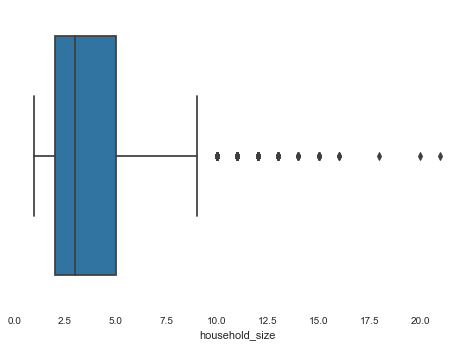

In [26]:
sns.boxplot(x=df['household_size'])

# ANNOVA Test 

In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install flask

In [29]:
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

In [30]:
model = ols('bank_account ~ marital_status', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           bank_account   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     29.68
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           5.15e-08
Time:                        22:53:08   Log-Likelihood:                -6867.8
No. Observations:               18819   AIC:                         1.374e+04
Df Residuals:                   18817   BIC:                         1.376e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1749      0.007     26.526      0.000       0.162       0.188
marital_status    -0.0138      0.003     -5.448      0.000      -0.019      -0.009
==============================================================================
Omnibus:                     6678.424   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16994.579
Skew:                           2.049   Prob(JB):                         0.00
Kurtosis:                       5.210   Cond. No.                         7.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
aov_table

,sum_sq,df,F,PR(>F)
marital_status,3.606510,1.0,29.684754,5.147104e-08
Residual,2286.146824,18817.0,NaN,NaN


In [33]:
model = ols('bank_account ~ education_level', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
education_level,242.795107,1.0,2231.933933,0.0
Residual,2046.958227,18817.0,NaN,NaN


In [34]:
model = ols('bank_account ~ job_type', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
job_type,9.899013,1.0,81.702468,1.731951e-19
Residual,2279.854322,18817.0,NaN,NaN


In [35]:
model = ols('bank_account ~ relationship_with_head', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
relationship_with_head,11.580564,1.0,95.651867,1.550013e-22
Residual,2278.172770,18817.0,NaN,NaN


In [36]:

model = ols('bank_account ~ gender_of_respondent', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
gender_of_respondent,30.632955,1.0,255.152541,4.638561e-57
Residual,2259.120380,18817.0,NaN,NaN


In [37]:
model = ols('bank_account ~ age_of_respondent', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
age_of_respondent,1.041783,1.0,8.565181,0.003431
Residual,2288.711551,18817.0,NaN,NaN


In [38]:
model = ols('bank_account ~ household_size', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
household_size,1.879136,1.0,15.455264,0.000085
Residual,2287.874199,18817.0,NaN,NaN


In [39]:
model = ols('bank_account ~ cellphone_access', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
cellphone_access,102.833029,1.0,884.810067,4.834916e-190
Residual,2186.920306,18817.0,NaN,NaN


In [40]:
model = ols('bank_account ~ location_type', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
location_type,16.833548,1.0,139.361222,4.764423e-32
Residual,2272.919786,18817.0,NaN,NaN


In [41]:
model = ols('bank_account ~ year', data=df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
year,27.253642,1.0,226.666009,6.297018e-51
Residual,2262.499693,18817.0,NaN,NaN


In [42]:
df1=df.drop(['bank_account','uniqueid'],axis=1)

# Modelling - without removing outliers

In [43]:
from sklearn.model_selection import train_test_split
y=df['bank_account']

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.33, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=34).fit(X_train, y_train)
train_pred=clf.predict(X_train)

C:\Users\SK074909\Anaconda3\envs\Rython\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
clf.score(X_train,train_pred)

1.0

In [46]:
train_pred=clf.predict(X_test)
clf.score(X_test,train_pred)

1.0

The model is overfitting 

# Removing Outliers and Modelling 

In [47]:
df=df[df['age_of_respondent']<82]

In [48]:
df[df['age_of_respondent']>=82]

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type


In [49]:
df=df[df['household_size']<=9]

In [50]:
from sklearn.model_selection import train_test_split
y=df['bank_account']
df2=df.drop(['bank_account','uniqueid'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=34).fit(X_train, y_train)
train_pred=clf.predict(X_train)

In [52]:
clf.score(X_train,train_pred)

1.0

In [53]:
test_pred=clf.predict(X_test)
clf.score(X_test,test_pred)

1.0

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5153
           1       0.66      0.24      0.35       872

    accuracy                           0.87      6025
   macro avg       0.77      0.61      0.64      6025
weighted avg       0.85      0.87      0.85      6025



In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[5047,  106],
       [ 663,  209]], dtype=int64)

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, test_pred, average='macro')

0.6406787576697168

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [58]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
test_pred=clf.predict(X_test)
clf.score(X_test,test_pred)

1.0

In [60]:
X_test

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
17933,1,0,0,1,4,27,1,1,2,0,1
2699,1,0,0,0,8,16,0,0,3,3,8
1757,1,0,0,0,3,60,0,1,4,0,8
3924,0,2,0,1,7,52,1,1,2,0,1
16293,2,1,1,1,1,66,0,1,4,2,9
...,...,...,...,...,...,...,...,...,...,...,...
14509,2,1,1,1,2,26,0,5,3,2,6
2993,0,2,0,1,5,35,0,5,2,2,1
15532,1,0,0,0,6,52,1,1,2,2,1
8078,1,0,1,1,7,19,0,0,3,3,8


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5153
           1       0.56      0.38      0.45       872

    accuracy                           0.87      6025
   macro avg       0.73      0.66      0.69      6025
weighted avg       0.85      0.87      0.86      6025



In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[4889,  264],
       [ 541,  331]], dtype=int64)

# Deployment

In [63]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
from flask import Flask,request,jsonify,render_template
import pickle
import numpy as np
app=Flask(__name__)
model=pickle.load(open('model.pkl','rb'))
debug=True
@app.route('/')
def home():
    #return render_template('index')
    return render_template('index.html')
#@app.route('/predict',methods=['POST','GET'])
@app.route('/predict',methods=['POST'])
def predict():
    #print(request.form)
    int_features=[int(x) for x in request.form.values()]
    final_features=[np.array(int_features)]
    prediction=model.predict(final_features)
    
    output=prediction[0]
    
    #return render_template('index',prediction_text='Marketimg Team Needs To contact this person by this strategy {}'.format(output))
    if output==1:
        result='The Person has a bank account'
    else:
        result="The Person doesn't have a bank account"
    return render_template('index.html',prediction_text='{}'.format(result))

if __name__=='__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Jun/2020 20:24:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2020 20:24:49] "GET /static/css/style.css HTTP/1.1" 304 -
127.0.0.1 - - [05/Jun/2020 20:34:19] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2020 20:35:04] "POST /predict HTTP/1.1" 200 -
